# Вероятностный подход в машинном обучении

### Несколько определений из теории вероятностей

-

### Теорема Байеса

Из определения условной вероятности, имеем:

$$
\begin{align}
P(X|Y) &= \frac{P(XY)}{P(Y)} \\
P(Y|X) &= \frac{P(YX)}{P(X)} = \frac{P(XY)}{P(X)}
\end{align}
$$

Выразим $P(XY)$ из каждого уравнения:

$$
P(XY) = P(X|Y) P(Y) = P(Y|X) P(X).
$$

Тогда

$$
P(Y|X) = \frac{P(X|Y) P(Y)}{P(X)},
$$

что называется *теоремой Байеса*.

Запишем теорему Байеса в терминологии машинного обучения:

$$
p(\theta | D) = \frac{p(\theta) p(D| \theta)}{p(D)} = \frac{p(\theta) p(D| \theta)}{\int p(D, \theta) d \theta} = \frac{p(\theta) p(D| \theta)}{\int p(D| \theta) p(\theta) d \theta} ,
$$

где

 - $p(\theta)$ -- априорная вероятность (prior probability) ~ регуляризация;
 - $p(D | \theta)$ -- правдоподобие (likelihood) ~ loss функция;
 - $p(\theta | D)$ -- апостериорная вероятность (posterior probability) ~ модель;
 - $p(D)$ -- вероятность данных (evidence) ~ датасет.

### Вероятностная поставнока задачи МО

По некоторому заданному набору данных $D$ определить набор параметров $\theta$, описывающий эти данные наилучшим образом. В статистике для решения этой задачи ищут *гипотезу максимального правдоподобия (maximum likelihood estimation, MLE)*:

$$
\theta_{MLE} = \arg \max_{\theta} p(D|\theta).
$$

В байесовском подходе и в современном МО ищут *апостериорное распределение (posterior)*:

$$
p(\theta|D) = \frac{p(\theta) p(D| \theta)}{\int p(D| \theta) p(\theta) d \theta} \propto p(D| \theta) p(\theta),
$$

где $a \propto b$ означает, что $a$ пропорционально $b$. Нормировочный член $\int p(D| \theta) p(\theta) d \theta$ опускают, так как он независит от $\theta$ и, следовательно, его можно не учитывать при решении задачи оптимизации. Введем понятие *максимальной апостериорной гипотезы (maximum a posteriori hypthesis, MAP)*:

$$
\theta_{MAP} = \arg \max_{\theta} p(\theta | D) = \arg \max_{\theta} p(D|\theta) p(\theta).
$$

Cчитаем, что каждый элемент датасета был порожден моделируемым процессом независимо от других элементов. Тогда:

$$
\theta_{MAP} = \arg \max_{\theta} p(\theta) \prod_{d \in D} p(d|\theta).
$$

Поскольку взятие произведение набора чисел, меньших единицы, приближалось бы к нулю, так как количество этих чисел растет с увеличением датасета, мы будем работать в пространстве логарифма, поскольку логарифм монотонно возрастающая функция, и максимизация исходной функции эквивалентна максимизации логарифма от этой функции:

$$
\theta_{MAP} = \arg \max_{\theta} \bigg[ \log p(\theta) + \sum_{d \in D} \log p(d|\theta) \bigg].
$$

Аналогично запишем для *MLE*:

$$
\theta_{MLE} = \arg \max_{\theta} \bigg[\sum_{d \in D} \log p(d|\theta) \bigg].
$$

Как можно заметить разница между *MAP* и *MLE* только в присутствии $p(\theta)$ (априорного распределения) у *MAP*. Интерпретировать этот факт можно следующим образом: формализация наших ожиданий относительно того, как распределены параметры модели, представлена в виде $p(\theta)$.

Пусть $p(\theta)$ -- равномерное распределение, то есть всевозможные значения параметра равновероятны, тогда $p(\theta) = const$. Следовательно, в таком случае можно исключить $p(\theta)$ из задачи оптимизации, что приводит к *MLE*. 

Вывод: *MLE*  -- это частный случай *MAP*, а априорное распределение $p(\theta)$ называется *регуляризацией*, то есть введением неких априорных знанений в процесс обучения.


### Линейная регрессия и MSE. Вероятностный подход

Линейная регрессия $y = \theta^{T}x$.

Введем предположение, что ошибка в наблюдениях (шум) аддедитивна и распределена нормально, то есть:

$$
\widetilde{y}(x)=y(x)+\xi,
$$

где $\xi \in \mathcal{N}(0,\sigma^2)$. Запишем плотность вероятности:

$$
p(\widetilde{y} | x, \theta, \sigma^2) = \mathcal{N}(\widetilde{y} | y_{\theta}(x), \sigma^2).
$$

Пусть задан набор данных $X=\{x_1,...,x_n\}$ со значениями $\widetilde{y}=\{\widetilde{y}_1,...,\widetilde{y}_n\}$, считаем, что значения были получены независимо, тогда:

$$
p(\widetilde{y} | X, \theta, \sigma^2) = \prod_{n=1}^N \mathcal{N}(\widetilde{y}_n | y_{\theta}(x), \sigma^2). 
\tag{1}
$$

Вид функции плотности для нормального распределения:

$$
p(x | \mu, \sigma) = \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{(x-\mu)^2}{2 \sigma^2}}.
\tag{2}
$$

Подставим $(2)$ в $(1)$ и возьмем логарифм от выражения:

$$
\begin{align}
\ln p(\widetilde{y} | X, \theta, \sigma^2) &= \ln \Bigg[ \prod_{n=1}^{N} \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{(\widetilde{y}_n-y_n)^2}{2 \sigma^2}} \Bigg] = \\
&= -\frac{N}{2} \ln (2 \pi \sigma^2) - \ln \Bigg[ \prod_{n=1}^{N} e^{-\frac{(\widetilde{y}_n-y_n)^2}{2 \sigma^2}} \Bigg] = \\
&= -\frac{N}{2} \ln (2 \pi \sigma^2) - \frac{1}{2 \sigma^2} \sum_{n=1}^{N} (\widetilde{y}_n - y_n)^2. 
\end{align}
\tag{3}
$$

Вспомним, что $\ln p(\widetilde{y} | X, \theta, \sigma^2)$ -- это *правдоподобие*, следовательно для определения параметров модели нужно найти *гипотезу максимального правдоподобия*, что сводится, исходя из полученного выражения $(3)$, к минимизации среднеквадратичной ошибки!

 **Вывод:** с одной стороны можно произвольным образом выбрать функцию ошибку и минимизировать ее, но с вероятностной стороны, выбор *MSE* в качестве невязки (функции ошибки) исходит из гипотезы о том, что данные зашумлены гауссовским шумом с нулевым мат. ожиданием и произвольной дисперсией. В случае другой припроды шума возможно выгоднее будет выбрать иную функцию цели. Тем не менее в природе нормальное распределение наиболее часто встречающееся (центральная придельная теорема и закон больших чисел).

 Попробуем показать, что MSE хуже подходит для шума иной природы. 
 
Решим задачу линейной регрессии на данных, зашумленных $\mathcal{N}(0,4)$ и $\mathcal{N}(4,4)$ (равномерное распределение).

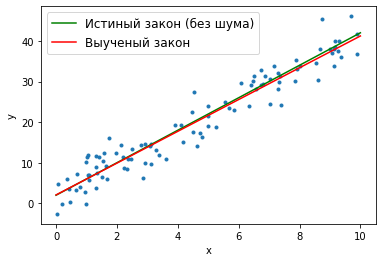

In [ ]:
from matplotlib import pyplot as plt
import numpy as np  

real_a = 4
real_b = 2

X = 10*np.random.rand(100,1)
y = real_a*X + real_b + np.random.randn(100,1)*4

X_b = np.c_[np.ones((100, 1)), X]

x_for_line = np.array([0,10])
true_line = real_a*x_for_line + real_b

theta_pred = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

pred_line = theta_pred[1]*x_for_line + theta_pred[0]

plt.plot(X,y, '.')
plt.plot(x_for_line, true_line, 'g-', label='Истиный закон (без шума)')
plt.plot(x_for_line, pred_line, 'r-', label='Выученый закон')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc="upper left", fontsize=12)
plt.show()

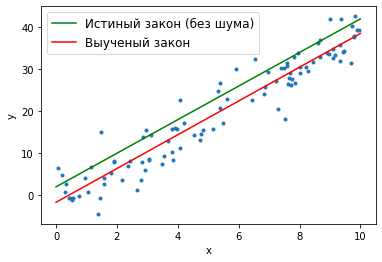

In [ ]:
X = 10*np.random.rand(100,1)
y = real_a*X + real_b + (-4 + np.random.randn(100,1)*4)

X_b = np.c_[np.ones((100, 1)), X]

x_for_line = np.array([0,10])
true_line = real_a*x_for_line + real_b

theta_pred = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

pred_line = theta_pred[1]*x_for_line + theta_pred[0]

plt.plot(X,y, '.')
plt.plot(x_for_line, true_line, 'g-', label='Истиный закон (без шума)')
plt.plot(x_for_line, pred_line, 'r-', label='Выученый закон')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc="upper left", fontsize=12)
plt.show()